Import new functions from `lof_calcs.py`.

In [2]:
from modules.lof_calcs import *

Import all samples, heterozygous or homozygous, convert to binary.

In [3]:
Control_2000_het = make_dataframe("data/Control_2000_het.tsv")
Treated_2000_het = make_dataframe("data/Treatment_2000_het.tsv")
Treated_1972_het = make_dataframe("data/Treatment_1972_het.tsv")

Control_2000_hom = make_dataframe("data/Control_2000_hom.tsv")
Treated_2000_hom = make_dataframe("data/Treatment_2000_hom.tsv")
Treated_1972_hom = make_dataframe("data/Treatment_1972_hom.tsv")

Calculate allele frequencies for each population.

In [4]:
Control_2000_het_pc = intra_pop_stat(Control_2000_het)
Treated_2000_het_pc = intra_pop_stat(Treated_2000_het)
Treated_1972_het_pc = intra_pop_stat(Treated_1972_het)

Control_2000_hom_pc = intra_pop_stat(Control_2000_hom)
Treated_2000_hom_pc = intra_pop_stat(Treated_2000_hom)
Treated_1972_hom_pc = intra_pop_stat(Treated_1972_hom)

Calculate product of differences in LOF mutation allele frequency between populations.

In [5]:
temp_time_het = inter_pop_stat(Treated_1972_het_pc, Treated_2000_het_pc)
loc_temp_het = inter_pop_stat(Control_2000_het_pc, Treated_2000_het_pc)
time_loc_het = inter_pop_stat(Treated_1972_het_pc, Control_2000_het_pc)

temp_time_hom = inter_pop_stat(Treated_1972_hom_pc, Treated_2000_hom_pc)
loc_temp_hom = inter_pop_stat(Control_2000_hom_pc, Treated_2000_hom_pc)
time_loc_hom = inter_pop_stat(Treated_1972_hom_pc, Control_2000_hom_pc)

Calculate product of differences in LOF mutation allele frequency between factors to isolate them.

In [6]:
temp_het = product_calc(temp_time_het, time_loc_het, loc_temp_het)
loc_het = product_calc(loc_temp_het, temp_time_het, time_loc_het)
time_het = product_calc(temp_time_het, loc_temp_het, time_loc_het)

temp_hom = product_calc(temp_time_hom, time_loc_hom, loc_temp_hom)
loc_hom = product_calc(loc_temp_hom, temp_time_hom, time_loc_hom)
time_hom = product_calc(temp_time_hom, loc_temp_hom, time_loc_hom)

Add some metadata.

In [7]:
temp_het = add_gff_metadata(temp_het, "Sm_ManualCuration.v1.1.2.gff")
loc_het = add_gff_metadata(loc_het, "Sm_ManualCuration.v1.1.2.gff")
time_het = add_gff_metadata(time_het, "Sm_ManualCuration.v1.1.2.gff")

temp_hom = add_gff_metadata(temp_hom, "Sm_ManualCuration.v1.1.2.gff")
loc_hom = add_gff_metadata(loc_hom, "Sm_ManualCuration.v1.1.2.gff")
time_hom = add_gff_metadata(time_hom, "Sm_ManualCuration.v1.1.2.gff")

Merge hetereozygous and homozygous dataframes together.

In [8]:
merged_temp = melt_merge_pops(temp_het, temp_hom)
merged_loc = melt_merge_pops(loc_het, loc_hom)
merged_time = melt_merge_pops(time_het, time_hom)

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resultiing Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  """Entry point for launching an IPython kernel.
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resultiing Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  
/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resultiing Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  This is separate from the ipykernel packag

### Allele frequencies for each factor per zygosity.

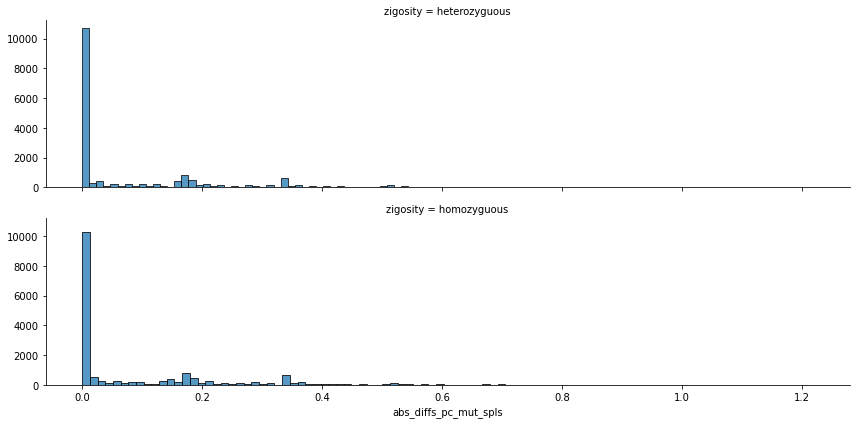

In [9]:
import seaborn as sns

g = sns.FacetGrid(merged_temp, row="zigosity", height=3, aspect=4)
g.map(sns.histplot, "abs_diffs_pc_mut_spls")

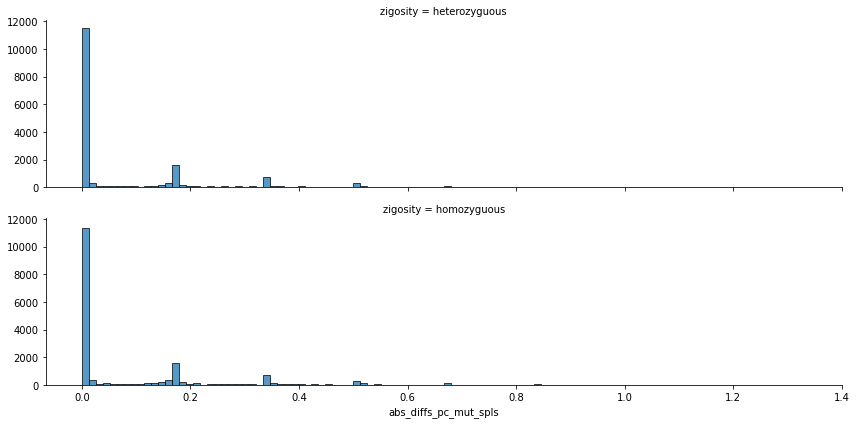

In [10]:
h = sns.FacetGrid(merged_loc, row="zigosity", height=3, aspect=4)
h.map(sns.histplot, "abs_diffs_pc_mut_spls")

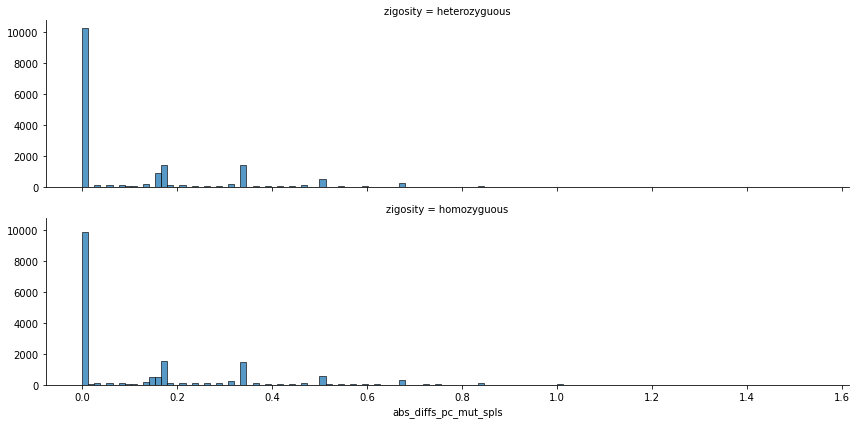

In [11]:
i = sns.FacetGrid(merged_time, row="zigosity", height=3, aspect=4)
i.map(sns.histplot, "abs_diffs_pc_mut_spls")

### Mean allele frequencies per chromosome per factor across zygosity.

/opt/tljh/user/lib/python3.7/site-packages/seaborn/axisgrid.py:645: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


Text(0.5, 0.98, 'Allele frequencies for Temperature')

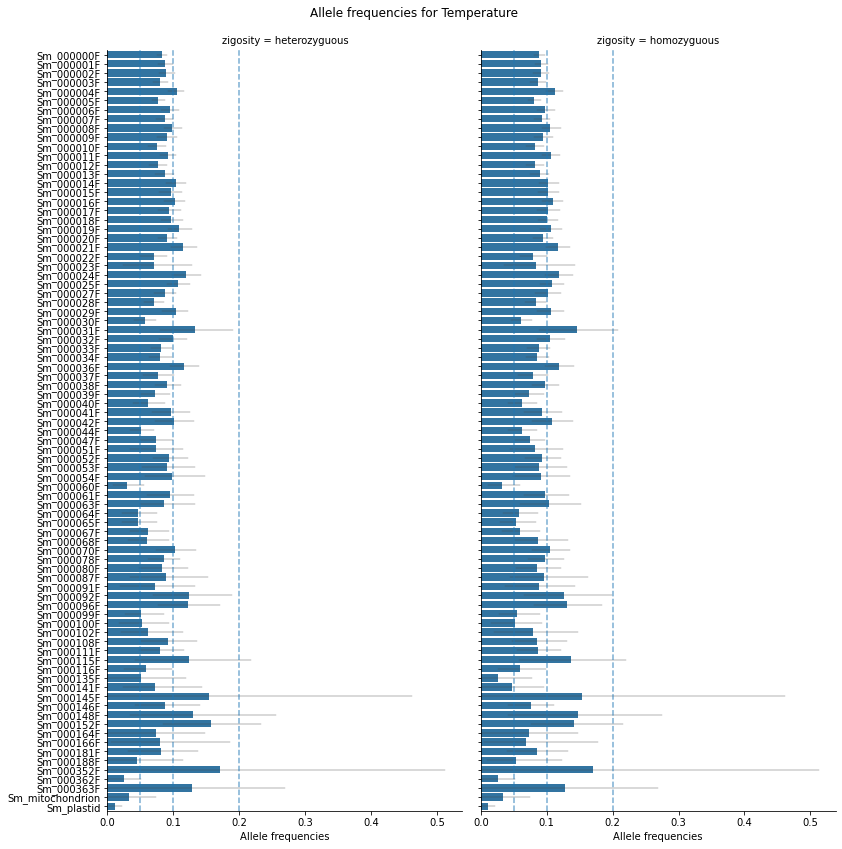

In [12]:
from numpy import mean
import matplotlib.pyplot as plt

j = sns.FacetGrid(merged_temp.sort_values(by=["chromosome"], ascending=True), col="zigosity",
                  height=12, aspect=.5)
j.map(sns.barplot, "abs_diffs_pc_mut_spls", "chromosome", 
      estimator=mean, 
      orient='h', errwidth=.4).set_axis_labels('Allele frequencies', '')

ax1, ax2 = j.axes[0]
ax1.axvline(.05, ls='--', alpha=.6)
ax1.axvline(.1, ls='--', alpha=.6)
ax1.axvline(.2, ls='--', alpha=.6)
ax2.axvline(.05, ls='--', alpha=.6)
ax2.axvline(.1, ls='--', alpha=.6)
ax2.axvline(.2, ls='--', alpha=.6)

plt.subplots_adjust(top=0.93)
j.fig.suptitle('Allele frequencies for Temperature')

/opt/tljh/user/lib/python3.7/site-packages/seaborn/axisgrid.py:645: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


Text(0.5, 0.98, 'Allele frequencies for Location')

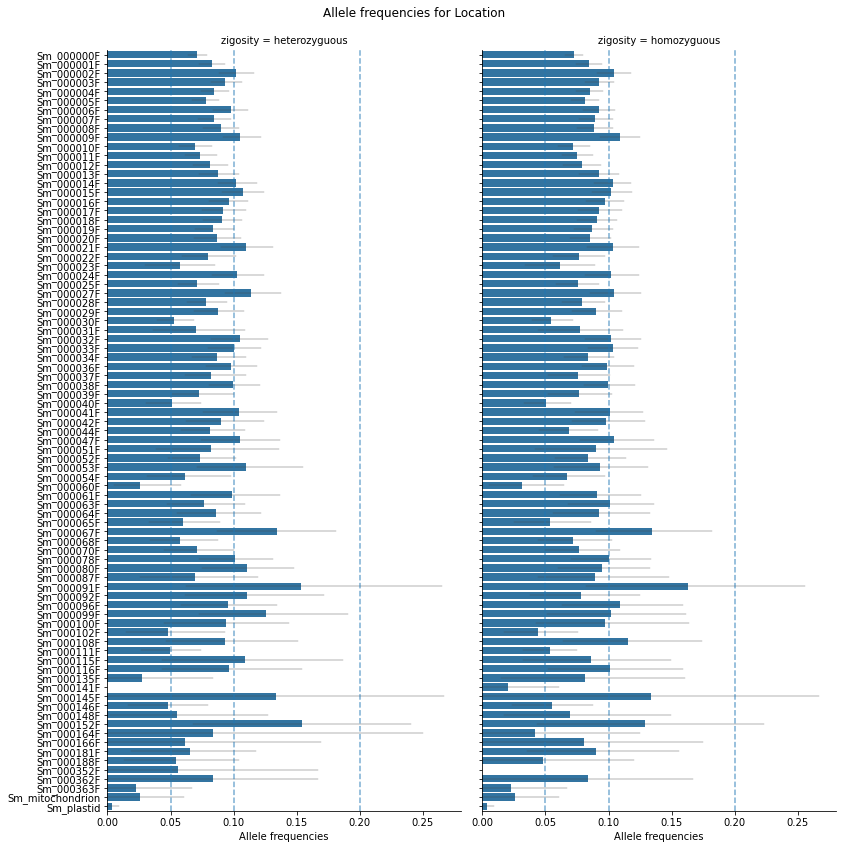

In [13]:
k = sns.FacetGrid(merged_loc.sort_values(by=["chromosome"], ascending=True), col="zigosity",
                  height=12, aspect=.5)
k.map(sns.barplot, "abs_diffs_pc_mut_spls", "chromosome", 
      estimator=mean, 
      orient='h', errwidth=.4).set_axis_labels('Allele frequencies', '')

ax1, ax2 = k.axes[0]
ax1.axvline(.05, ls='--', alpha=.6)
ax1.axvline(.1, ls='--', alpha=.6)
ax1.axvline(.2, ls='--', alpha=.6)
ax2.axvline(.05, ls='--', alpha=.6)
ax2.axvline(.1, ls='--', alpha=.6)
ax2.axvline(.2, ls='--', alpha=.6)

plt.subplots_adjust(top=0.93)
k.fig.suptitle('Allele frequencies for Location')

/opt/tljh/user/lib/python3.7/site-packages/seaborn/axisgrid.py:645: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


Text(0.5, 0.98, 'Allele frequencies for Time')

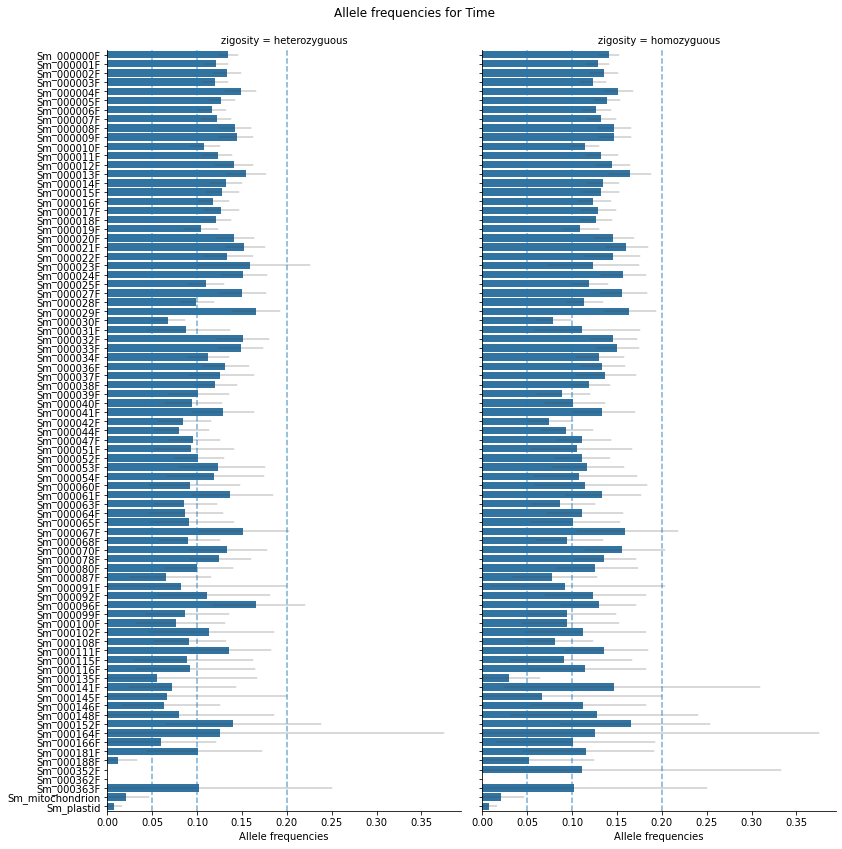

In [14]:
l = sns.FacetGrid(merged_time.sort_values(by=["chromosome"], ascending=True), col="zigosity",
                  height=12, aspect=.5)
l.map(sns.barplot, "abs_diffs_pc_mut_spls", "chromosome", 
      estimator=mean, 
      orient='h', errwidth=.4).set_axis_labels('Allele frequencies', '')

ax1, ax2 = l.axes[0]
ax1.axvline(.05, ls='--', alpha=.6)
ax1.axvline(.1, ls='--', alpha=.6)
ax1.axvline(.2, ls='--', alpha=.6)
ax2.axvline(.05, ls='--', alpha=.6)
ax2.axvline(.1, ls='--', alpha=.6)
ax2.axvline(.2, ls='--', alpha=.6)

plt.subplots_adjust(top=0.93)
l.fig.suptitle('Allele frequencies for Time')

### Plot means of ratios for all the above factors

In [174]:
temp_het["factor"] = "temperature"
loc_het["factor"] = "location"
time_het["factor"] = "time"

temp_hom["factor"] = "temperature"
loc_hom["factor"] = "location"
time_hom["factor"] = "time"

temp_ratio = pd.DataFrame(index = temp_hom.index)
temp_ratio = temp_hom[['chromosome', 'start', 'end', 'factor']].copy()
temp_ratio['pc_diffs_hom'] = temp_hom['abs_diffs_pc_mut_spls'].copy()
temp_ratio['pc_diffs_het'] = temp_het['abs_diffs_pc_mut_spls'].copy()
temp_ratio['ratio'] = (temp_hom['abs_diffs_pc_mut_spls'].round(10) / temp_het['abs_diffs_pc_mut_spls'].round(10)).replace([np.inf, -np.inf], np.nan).fillna(0)

loc_ratio = pd.DataFrame(index = loc_hom.index)
loc_ratio = loc_hom[['chromosome', 'start', 'end', 'factor']].copy()
loc_ratio['pc_diffs_hom'] = loc_hom['abs_diffs_pc_mut_spls'].copy()
loc_ratio['pc_diffs_het'] = loc_het['abs_diffs_pc_mut_spls'].copy()
loc_ratio['ratio'] = (loc_hom['abs_diffs_pc_mut_spls'].round(10) / loc_het['abs_diffs_pc_mut_spls'].round(10)).replace([np.inf, -np.inf], np.nan).fillna(0)

time_ratio = pd.DataFrame(index = time_hom.index)
time_ratio = time_hom[['chromosome', 'start', 'end', 'factor']].copy()
time_ratio['pc_diffs_hom'] = time_hom['abs_diffs_pc_mut_spls'].copy()
time_ratio['pc_diffs_het'] = time_het['abs_diffs_pc_mut_spls'].copy()
time_ratio['ratio'] = (time_hom['abs_diffs_pc_mut_spls'].round(10) / time_het['abs_diffs_pc_mut_spls'].round(10)).replace([np.inf, -np.inf], np.nan).fillna(0)

to_merge = [temp_ratio, loc_ratio, time_ratio]
merged_ratio = pd.concat(to_merge)
merged_ratio = merged_ratio[merged_ratio.chromosome != 'Sm_plastid']
merged_ratio = merged_ratio[merged_ratio.chromosome != 'Sm_mitochondrion']

#merged_ratio
#merged_ratio_nonzero_filt = merged_ratio_nonzero[(merged_ratio_nonzero['ratio'] >= 0.1) | (merged_ratio_nonzero['ratio'] <= -0.1)]

merged_ratio_nonzero = merged_ratio[(merged_ratio["ratio"] != 0)]
#merged_ratio_nonzero
#merged_ratio_nonzero.index = merged_ratio_nonzero.index.remove_unused_levels()
#merged_ratio_nonzero

In [176]:
#merged_ratio_nonzero.rename_axis('MyIdx').sort_values(by=['ratio','MyIdx'], ascending=False)

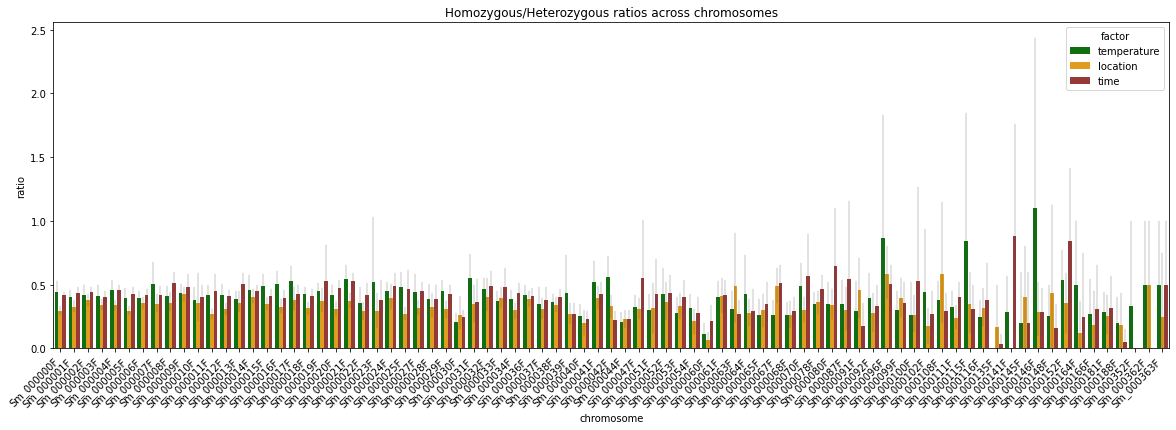

In [178]:
tvals=[-.5, -.4, -.3, -.2, -.1, 0, .1 ,.2, .3, .4, .5, 1, 2, 3, 3.5]

plt.figure(figsize=(20, 6))
n = sns.barplot(data = merged_ratio.sort_values(by=['chromosome','ratio'], ascending=True),
            x = 'chromosome', 
            y = 'ratio',
            hue="factor",
            estimator=mean, 
            palette=['green','orange','brown'],
            errwidth=.3)
n.set_xticklabels(n.get_xticklabels(),rotation=45, ha="right");
n.set_title('Homozygous/Heterozygous ratios across chromosomes');
#plt.show(n)

### Genes with highest hom/het ratios across factors

In [183]:
pd.options.display.float_format = '{:,.4f}'.format
merged_ratio.rename_axis('MyIdx').sort_values(by=['ratio','MyIdx'], ascending=False).head(20)

,chromosome,start,end,factor,pc_diffs_hom,pc_diffs_het,ratio
MyIdx,,,,,,,
Sm_g00007255,Sm_000010F,1397152,1399593,location,0.6795,0.0128,53.0000
Sm_g00000619,Sm_000000F,1888207,1893326,temperature,0.5128,0.0128,40.0000
Sm_g00011003,Sm_000019F,209200,210209,time,0.9231,0.0256,36.0000
Sm_g00005790,Sm_000007F,1508461,1510671,temperature,0.3590,0.0128,28.0000
Sm_g00000300,Sm_000000F,1116278,1121364,temperature,0.3590,0.0128,28.0000
Sm_g00005629,Sm_000007F,890081,892184,temperature,0.3462,0.0128,27.0000
Sm_g00016411,Sm_000047F,320947,321459,time,0.6923,0.0256,27.0000
Sm_g00005958,Sm_000011F,467960,469054,time,0.6667,0.0256,26.0000
Sm_g00007877,Sm_000014F,348647,349645,temperature,0.2821,0.0128,22.0000


### Genes with average allele frequencies larger than 0.2 for each factor

In [140]:
temp_het[temp_het['abs_diffs_pc_mut_spls'] > 0.2].sort_values(by=['abs_diffs_pc_mut_spls'], ascending=False)

,abs_diffs_pc_mut_spls,chromosome,start,end,zigosity,factor
Sm_g00009006,1.205,Sm_000015F,1052693,1054055,heterozyguous,temperature
Sm_g00007202,1.026,Sm_000010F,1253463,1254836,heterozyguous,temperature
Sm_g00012323,1.026,Sm_000030F,396159,397589,heterozyguous,temperature
Sm_g00008308,1.026,Sm_000016F,199304,199861,heterozyguous,temperature
Sm_g00004964,1.026,Sm_000006F,579151,580241,heterozyguous,temperature
...,...,...,...,...,...,...
Sm_g00004195,0.205,Sm_000002F,251178,252665,heterozyguous,temperature
Sm_g00004222,0.205,Sm_000002F,322999,323322,heterozyguous,temperature
Sm_g00013803,0.205,Sm_000033F,37525,38958,heterozyguous,temperature
Sm_g00008816,0.205,Sm_000015F,505543,507719,heterozyguous,temperature


In [141]:
temp_hom[temp_hom['abs_diffs_pc_mut_spls'] > 0.2].sort_values(by=['abs_diffs_pc_mut_spls'], ascending=False)

,abs_diffs_pc_mut_spls,chromosome,start,end,zigosity,factor
Sm_g00017640,1.218,Sm_000068F,88166,89506,homozyguous,temperature
Sm_g00009006,1.205,Sm_000015F,1052693,1054055,homozyguous,temperature
Sm_g00007688,1.179,Sm_000008F,1223143,1223631,homozyguous,temperature
Sm_g00000046,1.051,Sm_000000F,258845,259348,homozyguous,temperature
Sm_g00007202,1.038,Sm_000010F,1253463,1254836,homozyguous,temperature
...,...,...,...,...,...,...
Sm_g00011978,0.205,Sm_000021F,314355,315988,homozyguous,temperature
Sm_g00001726,0.205,Sm_000001F,1174815,1177825,homozyguous,temperature
Sm_g00008777,0.205,Sm_000015F,400267,402108,homozyguous,temperature
Sm_g00007494,0.205,Sm_000008F,614852,616396,homozyguous,temperature


In [142]:
loc_het[loc_het['abs_diffs_pc_mut_spls'] > 0.2].sort_values(by=['abs_diffs_pc_mut_spls'], ascending=False)

,abs_diffs_pc_mut_spls,chromosome,start,end,zigosity,factor
Sm_g00009942,1.333,Sm_000013F,290612,291100,heterozyguous,location
Sm_g00009018,1.192,Sm_000015F,1104148,1105514,heterozyguous,location
Sm_g00010385,1.192,Sm_000017F,501974,503343,heterozyguous,location
Sm_g00012875,1.167,Sm_000027F,487228,489757,heterozyguous,location
Sm_g00009441,1.077,Sm_000018F,1025213,1027835,heterozyguous,location
...,...,...,...,...,...,...
Sm_g00009211,0.205,Sm_000018F,403706,404902,heterozyguous,location
Sm_g00005429,0.205,Sm_000007F,393390,395444,heterozyguous,location
Sm_g00008797,0.205,Sm_000015F,462651,463783,heterozyguous,location
Sm_g00002782,0.205,Sm_000003F,73708,74390,heterozyguous,location


In [143]:
loc_hom[loc_hom['abs_diffs_pc_mut_spls'] > 0.2].sort_values(by=['abs_diffs_pc_mut_spls'], ascending=False)

,abs_diffs_pc_mut_spls,chromosome,start,end,zigosity,factor
Sm_g00009942,1.333,Sm_000013F,290612,291100,homozyguous,location
Sm_g00006653,1.218,Sm_000009F,1004766,1006369,homozyguous,location
Sm_g00010385,1.192,Sm_000017F,501974,503343,homozyguous,location
Sm_g00009018,1.179,Sm_000015F,1104148,1105514,homozyguous,location
Sm_g00007652,1.038,Sm_000008F,1082252,1086958,homozyguous,location
...,...,...,...,...,...,...
Sm_g00015703,0.205,Sm_000040F,333092,334153,homozyguous,location
Sm_g00005578,0.205,Sm_000007F,726530,727747,homozyguous,location
Sm_g00015694,0.205,Sm_000040F,293649,296029,homozyguous,location
Sm_g00001654,0.205,Sm_000001F,1014580,1015155,homozyguous,location


In [144]:
time_het[time_het['abs_diffs_pc_mut_spls'] > 0.2].sort_values(by=['abs_diffs_pc_mut_spls'], ascending=False)

,abs_diffs_pc_mut_spls,chromosome,start,end,zigosity,factor
Sm_g00003633,1.538,Sm_000004F,530906,533621,heterozyguous,time
Sm_g00003836,1.500,Sm_000004F,1084801,1085607,heterozyguous,time
Sm_g00003992,1.385,Sm_000004F,1538255,1540171,heterozyguous,time
Sm_g00004607,1.333,Sm_000002F,1293419,1293880,heterozyguous,time
Sm_g00015610,1.333,Sm_000040F,1027,1686,heterozyguous,time
...,...,...,...,...,...,...
Sm_g00005323,0.205,Sm_000007F,143704,148010,heterozyguous,time
Sm_g00001634,0.205,Sm_000001F,954848,958663,heterozyguous,time
Sm_g00009201,0.205,Sm_000018F,371707,373623,heterozyguous,time
Sm_g00007418,0.205,Sm_000008F,359003,360036,heterozyguous,time


In [145]:
time_hom[time_hom['abs_diffs_pc_mut_spls'] > 0.2].sort_values(by=['abs_diffs_pc_mut_spls'], ascending=False)

,abs_diffs_pc_mut_spls,chromosome,start,end,zigosity,factor
Sm_g00003633,1.538,Sm_000004F,530906,533621,homozyguous,time
Sm_g00003836,1.500,Sm_000004F,1084801,1085607,homozyguous,time
Sm_g00005770,1.385,Sm_000007F,1449672,1450748,homozyguous,time
Sm_g00003992,1.385,Sm_000004F,1538255,1540171,homozyguous,time
Sm_g00015610,1.333,Sm_000040F,1027,1686,homozyguous,time
...,...,...,...,...,...,...
Sm_g00001414,0.205,Sm_000001F,390897,391325,homozyguous,time
Sm_g00009327,0.205,Sm_000018F,703960,705747,homozyguous,time
Sm_g00004545,0.205,Sm_000002F,1138913,1140319,homozyguous,time
Sm_g00002162,0.205,Sm_000005F,279080,279475,homozyguous,time


`Sm_g00005770` is a BspA family leucine-rich repeat surface protein

### Genes that were mutated (heterozygous and homozygous) across all effects?

In [ ]:
temp_het_LOF_genes = (temp_het[temp_het.abs_diffs_pc_mut_spls > 0]).index
time_het_LOF_genes = (time_het[time_het.abs_diffs_pc_mut_spls > 0]).index
loc_het_LOF_genes = (loc_het[loc_het.abs_diffs_pc_mut_spls > 0]).index

genes_all_effects_het = list(set(temp_het_LOF_genes) & set(time_het_LOF_genes) & set(loc_het_LOF_genes))

temp_het[temp_het.index.isin(genes_all_effects_het)].drop('abs_diffs_pc_mut_spls', axis=1)

In [ ]:
temp_hom_LOF_genes = (temp_hom[temp_hom.abs_diffs_pc_mut_spls > 0]).index
time_hom_LOF_genes = (time_hom[time_hom.abs_diffs_pc_mut_spls > 0]).index
loc_hom_LOF_genes = (loc_hom[loc_hom.abs_diffs_pc_mut_spls > 0]).index

genes_all_effects_hom = list(set(temp_hom_LOF_genes) & set(time_hom_LOF_genes) & set(loc_hom_LOF_genes))

temp_hom[temp_hom.index.isin(genes_all_effects_hom)].drop('abs_diffs_pc_mut_spls', axis=1)

`Sm_g00000709` is an Integrase core domain-containing protein

### Mutated genes in common for all factors AND regardless of zigosity?

In [ ]:
genes_all_effects = list(set(genes_all_effects_hom) & set(genes_all_effects_het))
genes_all_effects_df = temp_hom[temp_hom.index.isin(genes_all_effects)].drop('abs_diffs_pc_mut_spls', axis=1)
temp_hom[temp_hom.index.isin(genes_all_effects)].drop('abs_diffs_pc_mut_spls', axis=1)

### Genes unique for each effect? Hetero+Homo

In [ ]:
temp_het_LOF_genes_unique = [x for x in temp_het_LOF_genes if x not in time_het_LOF_genes and x not in loc_het_LOF_genes]
time_het_LOF_genes_unique = [x for x in time_het_LOF_genes if x not in temp_het_LOF_genes and x not in loc_het_LOF_genes]
loc_het_LOF_genes_unique = [x for x in loc_het_LOF_genes if x not in time_het_LOF_genes and x not in temp_het_LOF_genes]

temp_hom_LOF_genes_unique = [x for x in temp_hom_LOF_genes if x not in time_hom_LOF_genes and x not in loc_hom_LOF_genes]
time_hom_LOF_genes_unique = [x for x in time_hom_LOF_genes if x not in temp_hom_LOF_genes and x not in loc_hom_LOF_genes]
loc_hom_LOF_genes_unique = [x for x in loc_hom_LOF_genes if x not in time_hom_LOF_genes and x not in temp_hom_LOF_genes]

#there's a lot of them
print("Temperature, heterologous: ", len(temp_het_LOF_genes_unique))
print("Time, heterologous: ", len(time_het_LOF_genes_unique))
print("Location, heterologous: ", len(loc_het_LOF_genes_unique))
print()
print("Temperature, homozygous: ", len(temp_hom_LOF_genes_unique))
print("Time, homozygous: ", len(time_hom_LOF_genes_unique))
print("Location, homozygous: ", len(loc_hom_LOF_genes_unique))

#storing that in dataframes

temp_het_LOF_genes_unique_df = temp_hom[temp_hom.index.isin(temp_het_LOF_genes_unique)].drop('abs_diffs_pc_mut_spls', axis=1)
time_het_LOF_genes_unique_df = temp_hom[temp_hom.index.isin(time_het_LOF_genes_unique)].drop('abs_diffs_pc_mut_spls', axis=1)
loc_het_LOF_genes_unique_df = temp_hom[temp_hom.index.isin(loc_het_LOF_genes_unique)].drop('abs_diffs_pc_mut_spls', axis=1)

temp_hom_LOF_genes_unique_df = temp_hom[temp_hom.index.isin(temp_hom_LOF_genes_unique)].drop('abs_diffs_pc_mut_spls', axis=1)
time_hom_LOF_genes_unique_df = temp_hom[temp_hom.index.isin(time_hom_LOF_genes_unique)].drop('abs_diffs_pc_mut_spls', axis=1)
loc_hom_LOF_genes_unique_df = temp_hom[temp_hom.index.isin(loc_hom_LOF_genes_unique)].drop('abs_diffs_pc_mut_spls', axis=1)

### What else?...

In [ ]:
temp_ratio = pd.DataFrame(index = temp_hom.index)

temp_ratio = temp_hom[['chromosome', 'start', 'end']].copy()


temp_ratio['ratio'] = (temp_het['abs_diffs_pc_mut_spls'] / temp_hom['abs_diffs_pc_mut_spls']).replace([np.inf, -np.inf], np.nan).fillna(0)
temp_ratio['gene'] = temp_ratio.index
temp_ratio = temp_ratio[temp_ratio['ratio'] != 0]
temp_ratio = temp_ratio[temp_ratio['ratio'] != 1]

sns.distplot(temp_ratio['ratio'])

In [ ]:
sns.barplot(data = temp_ratio,
            x = 'gene', y = 'ratio')

What effect is 'strongest'? Can that be measured?

Detect HET to HOMO transition?? How?

Calculate heterozyguous to homozyguous ratio? 
    
    Expected 2:1
    
    Admixed populations will be lower
    
    Calculation mostly results in Nan, Inf values as >>0/0, etc...
    
    Homo > Hete == Temperature
    Hete > Homo == Time, Location
    Maybe this means something?
    
    Heterozygous deficiency/excess—heterozygosity is the likelihood that there are different alleles at one genetic locus. In an ideal population, its fraction is determined by HWE. Deviations in the heterozygosity indicate inbreeding (deficiency) or heterozygote superiority or extensive clonality (excess).  https://academic.oup.com/plankt/article/39/2/165/2929413

All factors seem to have % impact in driving Smarinoi response

Venn diagram of all SVs, SNPs/allele frequencies detected?

